In [1]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from sympy.parsing.sympy_parser import parse_expr

In [3]:
import numpy as np

import sympy as sym

In [4]:
epsilon, c, delta  = sym.symbols("epsilon, c, delta")

In [5]:
# set epsilon to 0
e_val = 0.0000


# c and delta will vary from 0 to 1
cvals, dvals = (np.linspace(0 + 10 ** (- 3), 1  - 10 ** (- 3), 5).round(3),
                np.linspace(0 + 10 ** (- 3), 1  - 10 ** (- 3), 5).round(3),)

In [6]:
files = [f"d{i}" for i in range(32)]

files[0] = "ALLD (D)"; files[16] = "ALLD (C)"

files[15] = "ALLC (D)"; files[31] = "ALLC (C)"

files[8] = "GT (D)"; files[24] = "GT (C)"

files[9] = "WSLS (D)"; files[25] = "WSLS (C)"

files[10] = "TFT (D)"; files[26] = "TFT (C)"

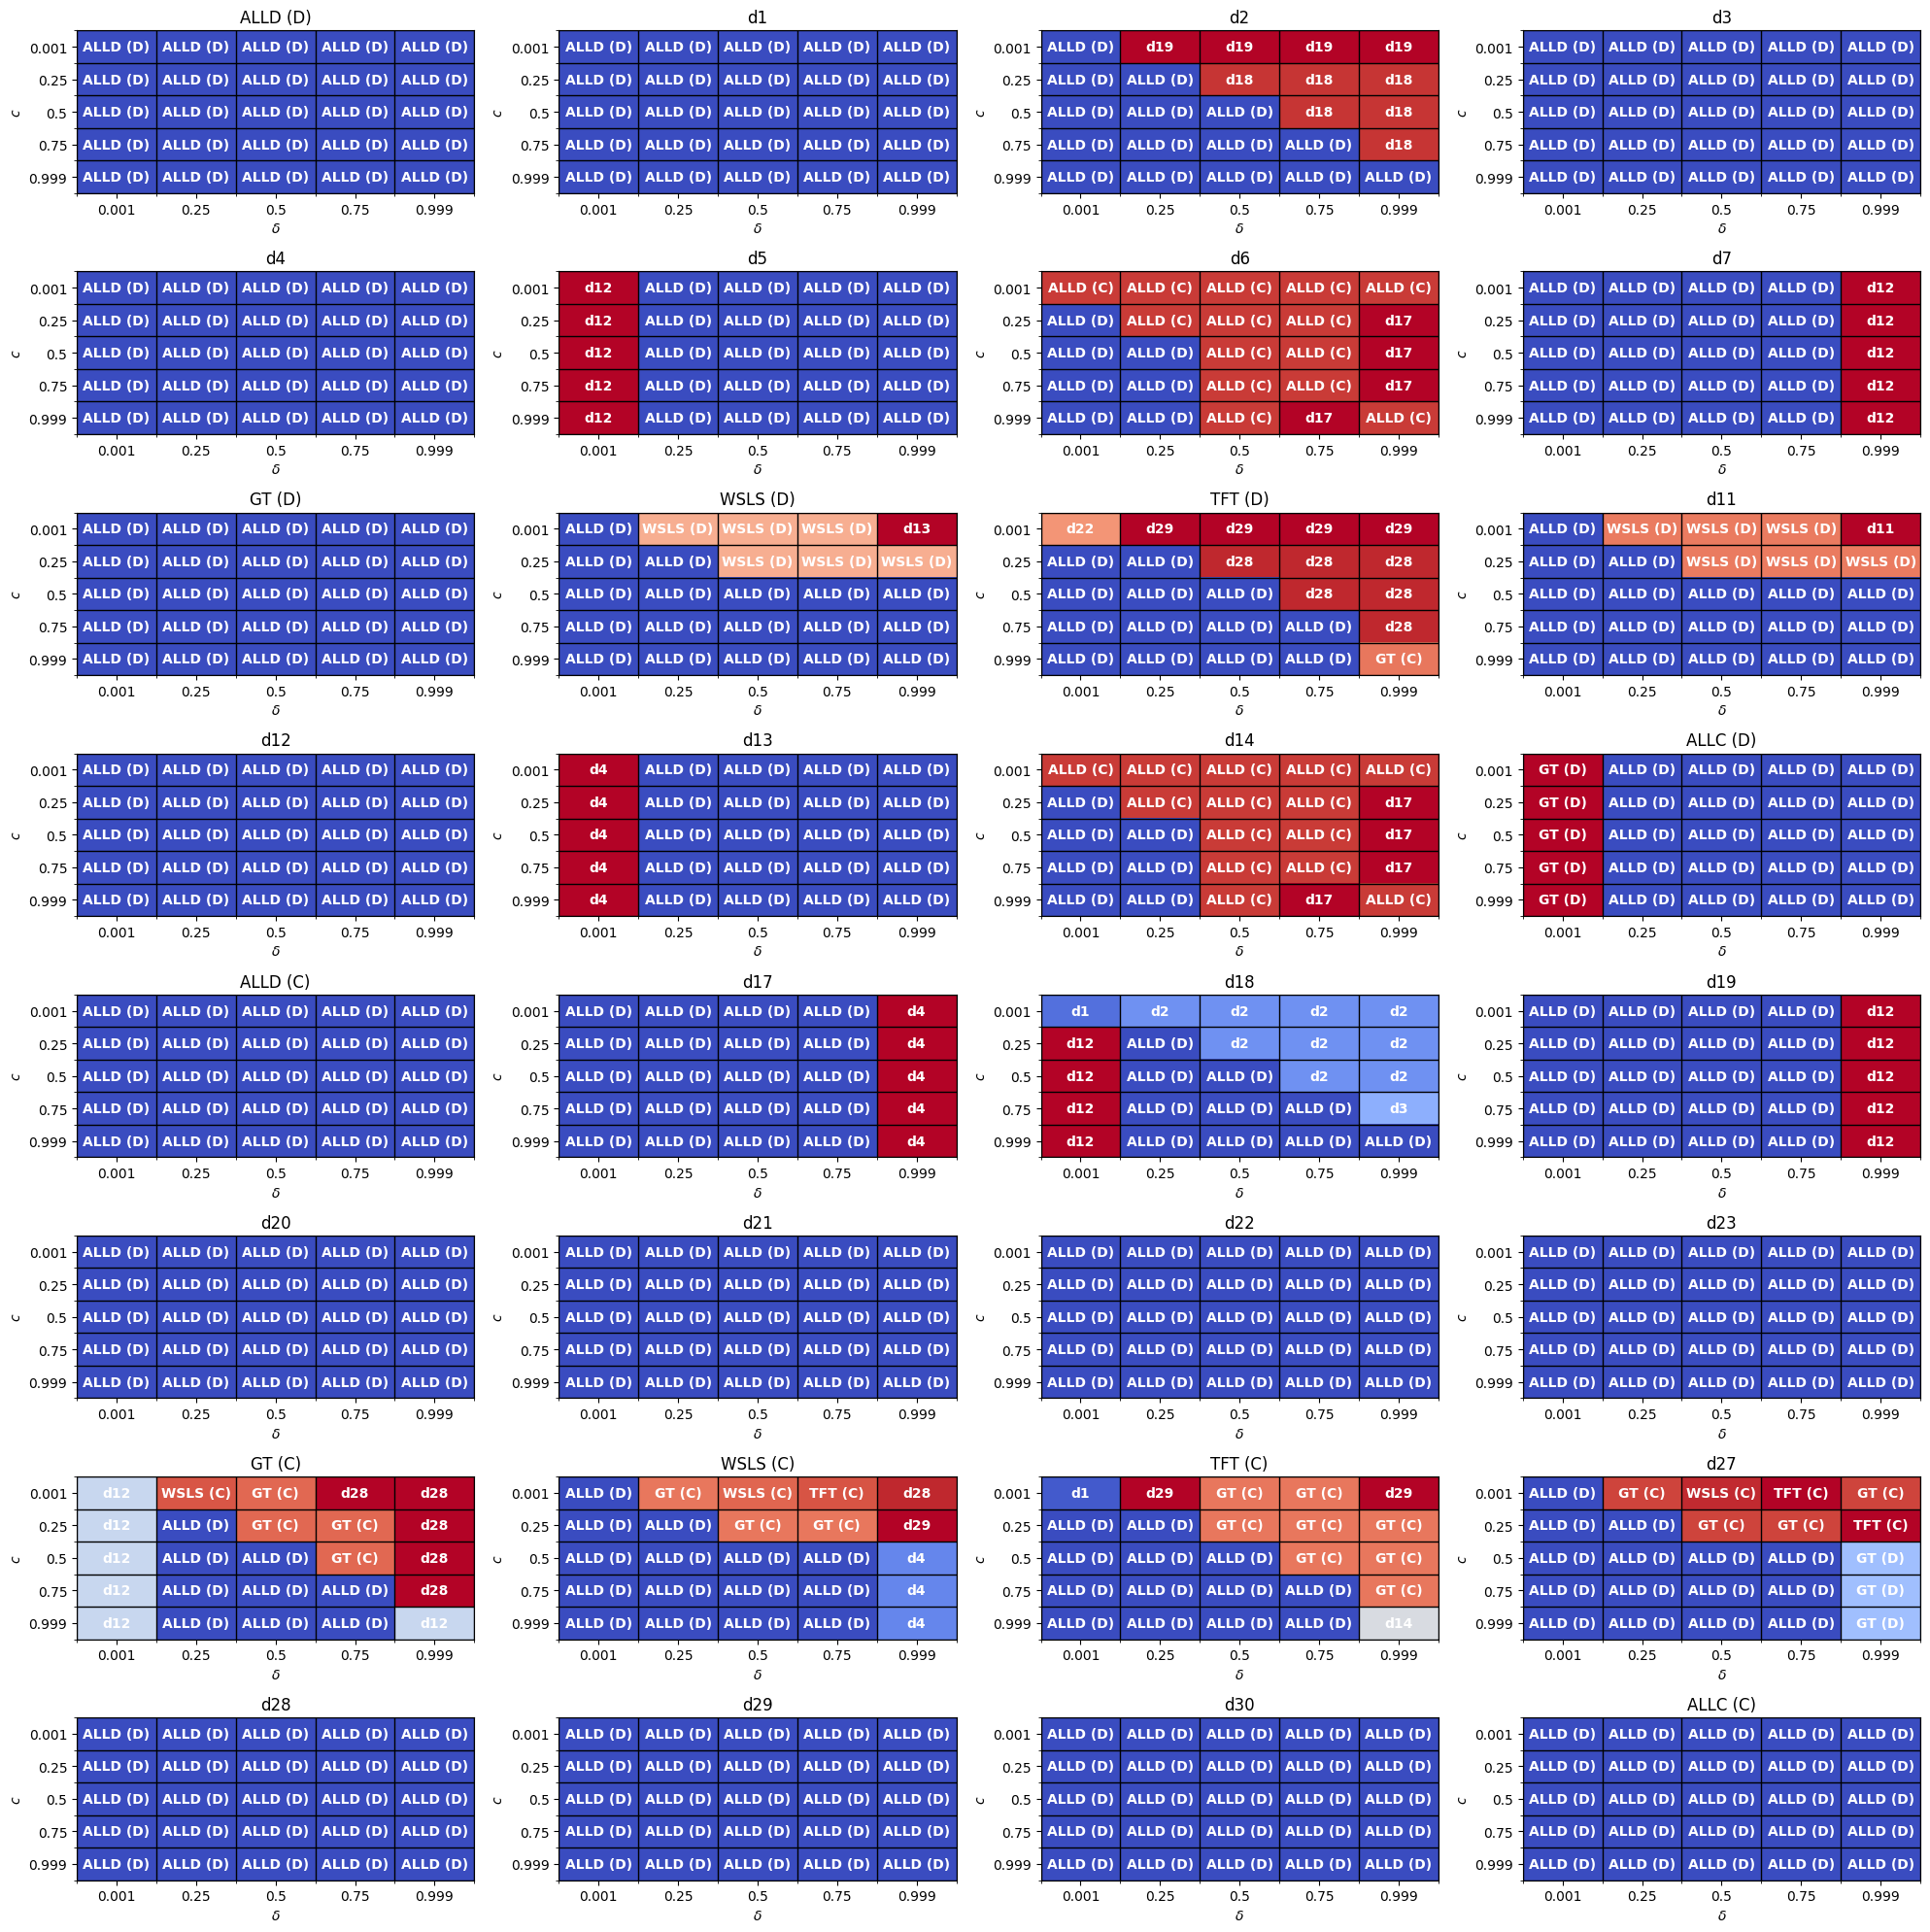

In [8]:
fig, ax = plt.subplots(nrows=8, ncols=4, figsize=(20, 20))

for l, filename in enumerate(files):
    

    # Read in file
    with open(f"outputs/{filename}_payoffs.txt") as f:
        file = f.readlines()
    
    # payoffs expressions
    payoffs = [parse_expr(f.split("\t")[1].replace("\n", "")).subs({epsilon: 0}) for f in file]

    # data
    data = np.zeros((5, 5))
    for i, c_val in enumerate(cvals):
        for j, d_val in enumerate(dvals):
            data[i, j] = np.argmax([p.subs({epsilon: e_val, c: c_val, delta:d_val}) for p in payoffs])
        
        
    index = (int(l / 4), l % 4)
            
    im = ax[index].imshow(data, origin="upper", aspect="auto", cmap='coolwarm')

    # Major ticks
    ax[index].set_xticks(np.arange(0, 5, 1))
    ax[index].set_yticks(np.arange(0, 5, 1))

    # Labels for major ticks
    ax[index].set_xticklabels(dvals)
    ax[index].set_yticklabels(cvals)
    ax[index].set_ylabel("$c$")
    ax[index].set_xlabel("$\delta$")

    # Minor ticks
    ax[index].set_xticks(np.arange(-.5, 5, 1), minor=True)
    ax[index].set_yticks(np.arange(-.5, 5, 1), minor=True)

    ax[index].grid(which='minor', color='black', linestyle='-', linewidth=1)
    
    ax[index].set_title(filename)

    for (i, j), val in np.ndenumerate(data):
        ax[index].text(j, i, labels[int(val)], ha='center',
                       va='center',
                       color="w", 
                       weight='bold',
                       fontsize=10)
        
fig.tight_layout()

**Table instead of heatmap**

In [7]:
labels = [f"d{i}" for i in range(32)]

In [8]:
# c and delta will vary from 0 to 1
cvals, dvals = (np.linspace(0 + 10 ** (- 2), 1  - 10 ** (- 2), 5).round(3),
                np.linspace(0 + 10 ** (- 2), 1  - 10 ** (- 2), 5).round(3),)

In [9]:
f"outputs/{files[0]}_payoffs.txt"

'outputs/ALLD (D)_payoffs.txt'

'd1'

In [175]:
with open(f"outputs/{files[27]}_payoffs.txt") as f:
    file = f.readlines()
    
payoffs = [parse_expr(f.split("\t")[1].replace("\n", "")) for f in file]

eto0 = [p.subs({epsilon: 0}).factor() for p in payoffs]

dict_best_responses =  {}

    
for i, c_val in enumerate(cvals):
    for j, d_val in enumerate(dvals):
        
        numerical_eval_payoffs = [round(float(p.subs({c: c_val, delta:d_val})), 10)
                                  for p in eto0]
        
        idx_br = np.argwhere(numerical_eval_payoffs == np.amax(numerical_eval_payoffs))
        
        dict_best_responses[(c_val, d_val)] = [labels[i[0]] for i in idx_br]      

In [176]:
dict_best_responses

{(0.01, 0.01): ['d0', 'd4', 'd8', 'd12'],
 (0.01, 0.255): ['d24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31'],
 (0.01, 0.5): ['d24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31'],
 (0.01, 0.745): ['d24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31'],
 (0.01, 0.99): ['d24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31'],
 (0.255, 0.01): ['d0', 'd4', 'd8', 'd12'],
 (0.255, 0.255): ['d0', 'd4', 'd8', 'd12'],
 (0.255, 0.5): ['d24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31'],
 (0.255, 0.745): ['d24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31'],
 (0.255, 0.99): ['d24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31'],
 (0.5, 0.01): ['d0', 'd4', 'd8', 'd12'],
 (0.5, 0.255): ['d0', 'd4', 'd8', 'd12'],
 (0.5, 0.5): ['d0', 'd4', 'd8', 'd12'],
 (0.5, 0.745): ['d0', 'd4', 'd8', 'd12'],
 (0.5, 0.99): ['d0', 'd4', 'd8', 'd12'],
 (0.745, 0.01): ['d0', 'd4', 'd8', 'd12'],
 (0.745, 0.255): ['d0', 'd4', 'd8', 'd12'],
 (0.745, 0.5): ['d0', 'd4', 'd8', 'd12'],
 (0.745, 0.745): ['d0

In [178]:
eto0[24].factor().subs({c: delta})

1 - delta

In [134]:
sym.solve(eto0[0].factor() - eto0[2], c)

[delta]

In [82]:
sym.solveset(eto0[0].factor() > eto0[16], c, sym.S.Reals)

ConditionSet(c, 0 > c*delta - c + delta, Reals)

In [45]:
# [e.subs({c: delta}).factor() for e in eto0]

In [46]:
import itertools

pure_strategies = list(itertools.product([0, 1], repeat=5))

In [48]:
pure_strategies[4]

(0, 0, 1, 0, 0)

In [49]:
sym.solve(eto0[0] - eto0[24], c)[0].subs({delta: 0.255})

0.203187250996016

In [57]:
flat = []
for i in list(dict_best_responses.values()):
    flat += i

In [59]:
set(flat)

{'d0', 'd1', 'd10', 'd11', 'd12', 'd2', 'd3', 'd4', 'd8', 'd9'}

In [ ]:
0, 4, 8, 12

In [ ]:
1, 9, 

In [83]:
2, 3, 10, 11

(2, 3, 10, 11)

In [95]:
sym.solve((eto0[0] - eto0[2]).simplify(), c)

[delta]

In [89]:
(eto0[0] - eto0[1] - eto0[2]).simplify()

-delta + (c*delta**2 - 1)/(delta**2 + delta + 1) + 1 + (c*delta - 1)/(delta + 1)

In [98]:
eto0[0].subs({delta:0.255, c:0.255})

0.745000000000000

In [105]:
eto0[1].subs({delta:0.255, c:0.255})

0.745000000000000

In [108]:
sym.solve(eto0[0] - eto0[1], c)

[delta]

In [116]:
float(eto0[0].subs({c: .255, delta: .255}))

0.745

In [119]:
numerical_eval_payoffs = [round(float(p.subs({c: .255, delta: .255})), 10)
                          for p in eto0]

idx_br = np.argwhere(numerical_eval_payoffs == np.amax(numerical_eval_payoffs))

In [120]:
numerical_eval_payoffs

[0.745,
 0.745,
 0.745,
 0.745,
 0.745,
 0.7417968405,
 0.7326468756,
 0.7324385902,
 0.745,
 0.745,
 0.745,
 0.745,
 0.745,
 0.741630876,
 0.731787749,
 0.731787749,
 0.555025,
 0.555025,
 0.555025,
 0.555025,
 0.555025,
 0.5518218405,
 0.555025,
 0.5518218405,
 0.555025,
 0.555025,
 0.555025,
 0.555025,
 0.541812749,
 0.541812749,
 0.541812749,
 0.541812749]

In [101]:
idx_br

array([[ 1],
       [ 2],
       [ 3],
       [ 9],
       [10],
       [11]])

In [96]:
dict_best_responses

{(0.01, 0.01): ['d0', 'd2', 'd3', 'd4', 'd8', 'd10', 'd11', 'd12'],
 (0.01, 0.255): ['d2', 'd3', 'd10', 'd11'],
 (0.01, 0.5): ['d2', 'd3', 'd10', 'd11'],
 (0.01, 0.745): ['d2', 'd3', 'd10', 'd11'],
 (0.01, 0.99): ['d2', 'd3', 'd10', 'd11'],
 (0.255, 0.01): ['d0', 'd4', 'd8', 'd12'],
 (0.255, 0.255): ['d1', 'd2', 'd3', 'd9', 'd10', 'd11'],
 (0.255, 0.5): ['d2', 'd3', 'd10', 'd11'],
 (0.255, 0.745): ['d2', 'd3', 'd10', 'd11'],
 (0.255, 0.99): ['d2', 'd3', 'd10', 'd11'],
 (0.5, 0.01): ['d0', 'd4', 'd8', 'd12'],
 (0.5, 0.255): ['d0', 'd4', 'd8', 'd12'],
 (0.5, 0.5): ['d0', 'd1', 'd2', 'd3', 'd4', 'd8', 'd9', 'd10', 'd11', 'd12'],
 (0.5, 0.745): ['d2', 'd3', 'd10', 'd11'],
 (0.5, 0.99): ['d2', 'd3', 'd10', 'd11'],
 (0.745, 0.01): ['d0', 'd4', 'd8', 'd12'],
 (0.745, 0.255): ['d0', 'd4', 'd8', 'd12'],
 (0.745, 0.5): ['d0', 'd4', 'd8', 'd12'],
 (0.745, 0.745): ['d0', 'd2', 'd3', 'd4', 'd8', 'd10', 'd11', 'd12'],
 (0.745, 0.99): ['d2', 'd3', 'd10', 'd11'],
 (0.99, 0.01): ['d0', 'd4', 'd8', 'd12

In [395]:
print(sym.latex(eto0[0].collect(c)))

1 - \delta


In [396]:
eto0[1].simplify().factor()

-(c*delta**2 - 1)/(delta**2 + delta + 1)

In [400]:
sym.solve((eto0[1] - eto0[24].simplify()).factor(), c)

[delta]

In [401]:
eto0[24]

1 - c

In [399]:
dict_best_responses

{(0.001, 0.001): ['d1', 'd9', 'd17', 'd22', 'd23'],
 (0.001, 0.25): ['d24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31'],
 (0.001, 0.5): ['d24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31'],
 (0.001, 0.75): ['d24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31'],
 (0.001, 0.999): ['d24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31'],
 (0.25, 0.001): ['d0', 'd4', 'd8', 'd12'],
 (0.25, 0.25): ['d0',
  'd1',
  'd2',
  'd3',
  'd4',
  'd5',
  'd6',
  'd7',
  'd8',
  'd9',
  'd10',
  'd11',
  'd12',
  'd13',
  'd14',
  'd15',
  'd16',
  'd17',
  'd18',
  'd19',
  'd20',
  'd21',
  'd22',
  'd23',
  'd24',
  'd25',
  'd26',
  'd27',
  'd28',
  'd29',
  'd30',
  'd31'],
 (0.25, 0.5): ['d24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31'],
 (0.25, 0.75): ['d24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31'],
 (0.25, 0.999): ['d24', 'd25', 'd26', 'd27', 'd28', 'd29', 'd30', 'd31'],
 (0.5, 0.001): ['d0', 'd4', 'd8', 'd12'],
 (0.5, 0.25): ['d0', 'd4', 'd8', 'd12'],
 (0.5, 0.5): [

In [238]:
eto0[0]

delta

In [224]:
eto0[18], eto0[19], eto0[26], eto0[27]

(c*(delta - 1), -c/(delta + 1), c*(delta - 1), -c/(delta + 1))

In [218]:
print(sym.latex(eto0[0]))

\frac{\delta}{\delta + 1}


In [207]:
dict_best_responses[(0.001, 0.112)]

['d18', 'd19', 'd26', 'd27']